In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.set_option("display.max_rows", 4000)
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_colwidth", 300)
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
train = pd.read_csv('/content/train (1).csv')
test = pd.read_csv('/content/test (1).csv')
ida = test['Id']

In [3]:
cat_train=  [ i for i in train.columns if train.dtypes[i]=='object' if train[i].isnull().values.any()]
for i in cat_train:
    train[i].fillna('no',inplace=True)
num_train=  [ i for i in train.columns if train.dtypes[i]!='object' if train[i].isnull().values.any()]
for i in num_train:
    train[i].fillna(train[i].mean(),inplace=True)

In [4]:
cat_test=  [ i for i in test.columns if test.dtypes[i]=='object' if test[i].isnull().values.any()]
for i in cat_test:
    test[i].fillna('no',inplace=True)
num_test=  [ i for i in test.columns if test.dtypes[i]=='object' if test[i].isnull().values.any()]    
for i in num_train:
    test[i].fillna(test[i].mean(),inplace=True) 

In [5]:
df = pd.concat([train,test])

In [6]:
df.drop(['Alley','Id','PoolQC','Fence'], axis = 1,inplace  =True)

In [7]:
col = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'MiscFeature',
       'SaleType', 'SaleCondition']

In [8]:
from sklearn.preprocessing import LabelEncoder
for i in col:  
    m = LabelEncoder()
    m.fit(df[i])
    df[i] = m.transform(df[i])

In [9]:
dff = pd.get_dummies(df)
df_tr = dff[dff['SalePrice'].isnull()==False]
df_te = dff[dff['SalePrice'].isnull()]
df_te.drop(['SalePrice'], axis = 1, inplace = True)

In [10]:
a = np.log(df_tr['SalePrice'])
x_train, x_test, y_train, y_test = train_test_split(df_tr.drop(['SalePrice'], axis = 1), a, test_size = 0.13, random_state = 0)

In [11]:
gb=GradientBoostingRegressor(n_estimators=300,max_depth=3)
gb.fit(x_train,y_train)
y_pred_gb=gb.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_gb))
print("RMSE: ", rmse)
r2 = r2_score(y_test, y_pred_gb)
print("R2 score: ", r2)

RMSE:  0.1144525471305742
R2 score:  0.9089162458195599


In [12]:
y_pred = gb.predict(x_test)
mse=metrics.mean_squared_error(y_test,y_pred)
print(np.sqrt(mse))
r2_score(y_test, y_pred)

0.1144525471305742


0.9089162458195599

In [13]:
y_pred = gb.predict(x_train)
mse=metrics.mean_squared_error(y_train,y_pred)
print(np.sqrt(mse))
r2_score(y_train, y_pred)

0.03666946228306961


0.9913575272325086

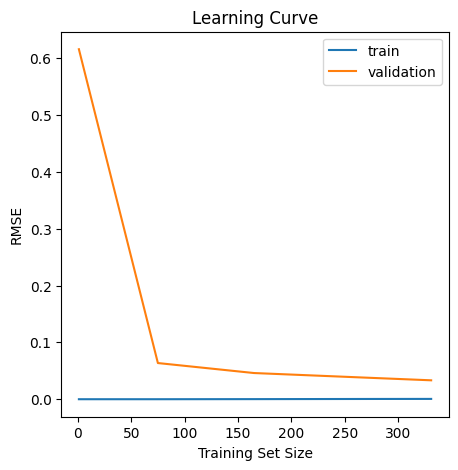

In [14]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=gb,
    X=df_tr,
    y=a,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes = [1, 75, 165, 270, 331]
)

train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)

plt.subplots(figsize=(5,5))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.legend(loc="best")

plt.show()

In [15]:
a = ida
final_predictions= np.exp(gb.predict(df_te))
submission = pd.concat([a,pd.Series(final_predictions,name="SalePrice")],axis=1)
submission
submission.to_csv("222.csv",index=False,header=True)